In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy
from sklearn.preprocessing import StandardScaler , LabelEncoder , RobustScaler , StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('customer_segmentation.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis 

In [3]:
# CHECK UNIQUE COLUMNS
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# CHECK TYPE DATA EACH COLUMNS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# CHECK TOTAL OF UNIQUE CLASS IN EACH FEATURE/COLUMNS
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## - Check Duplicate Data

In [6]:
# CHECK DUPLICATED SAMPLE
data.duplicated().sum()

np.int64(0)

## - Check Descriptive Statistics 

In [7]:
# CHECK DESCRIPTIVE STATISTICS
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


## -   Handling Missing Values

In [8]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# DELETE MISSING VALUES

data_clean = data.dropna(axis=0, how='any')
data_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
# SEPARATING NUMERIC AND OBJECT DATA

object_data = data_clean.select_dtypes('object')
numeric_data = data_clean.select_dtypes(('int64','float64'))
numeric_data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)  # DROP USELESS FEATURE

object_data.shape , numeric_data.shape , type(object_data) , type(numeric_data)

((2216, 3),
 (2216, 24),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

## -  Check Distribution Data

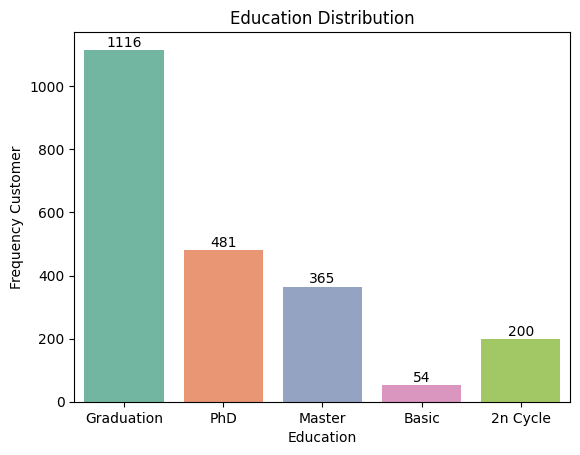

In [11]:
# DISPLAY EDUCATION BAR CHART
axes = sns.countplot(data= object_data, x = 'Education', palette='Set2')

# TO DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    height = ax.get_height()  # GET HEIGHT AXIS
    axes.text(x = ax.get_x() + ax.get_width() / 2. , y = height + 1, s = int(height), ha='center', va='bottom', fontsize=10)

plt.title('Education Distribution')
plt.ylabel('Frequency Customer')
plt.show()

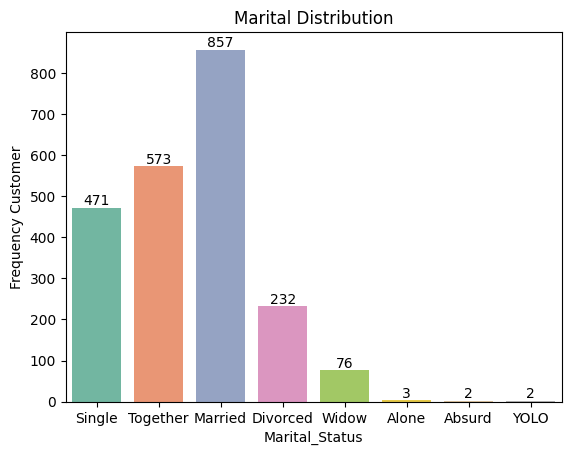

In [12]:
# DISPLAY MARITAL STATUS

axes = sns.countplot(data= object_data, x= 'Marital_Status', palette='Set2')

for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=10)

plt.title('Marital Distribution')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of marital status based on education')

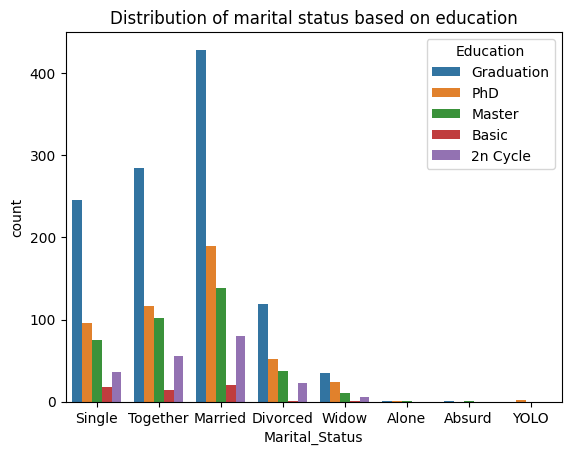

In [13]:

sns.countplot(data= object_data, x='Marital_Status', hue='Education')
plt.title('Distribution of marital status based on education')


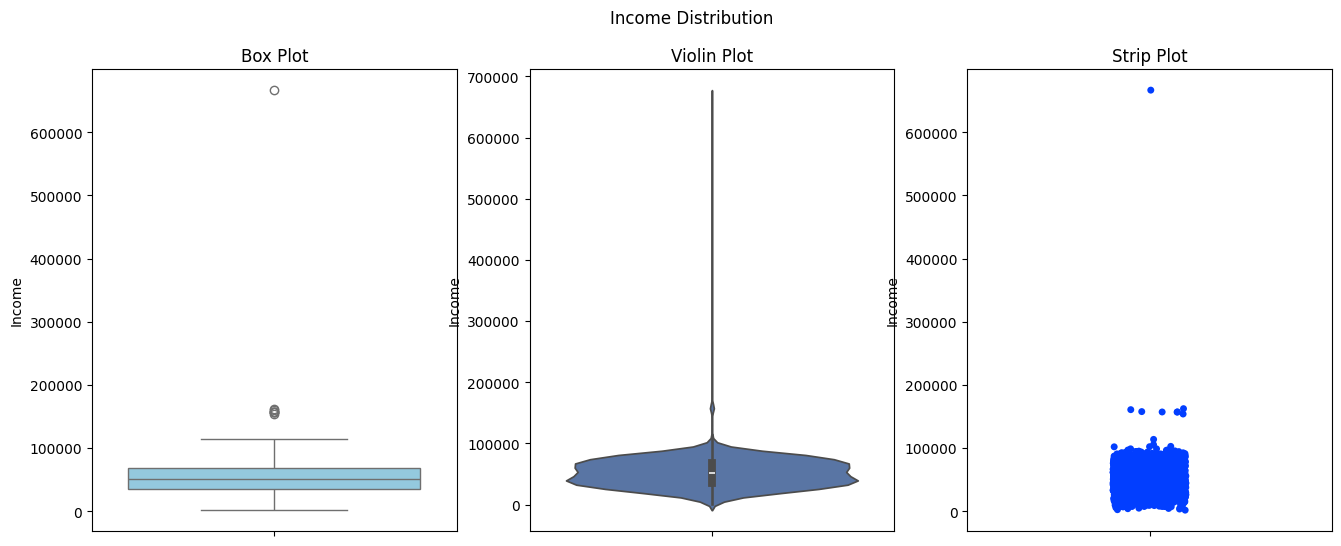

In [14]:
# DISPLAY INCOME DISTRIBUTION USING BOXPLOT AND VIOLINPLOT

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data= numeric_data, y='Income', color='skyblue')
plt.title('Box Plot')

plt.subplot(1,3,2)
sns.violinplot(data= numeric_data, y='Income', palette='deep')
plt.title('Violin Plot')

plt.subplot(1,3,3)
sns.stripplot(data= numeric_data, y='Income', palette='bright')
plt.title('Strip Plot')

plt.suptitle('Income Distribution')
plt.show()

There is 1 sample where the difference is very big. 

In [15]:
# DELETE OUTLIER

data_clean = data_clean[data_clean['Income'] < 120000]
data_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


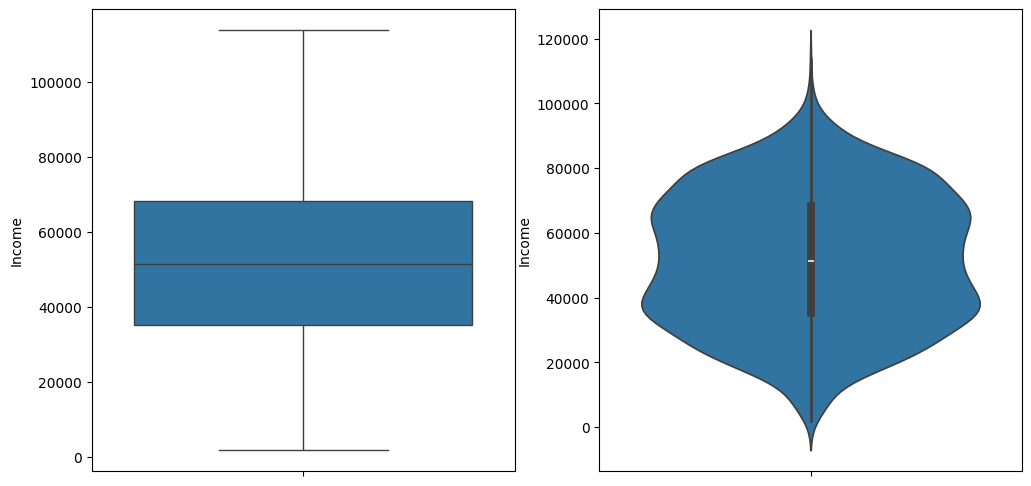

In [16]:
# CHECK IT BACK

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data= data_clean, y='Income')

plt.subplot(1,2,2)
sns.violinplot(data= data_clean, y='Income')

plt.show()


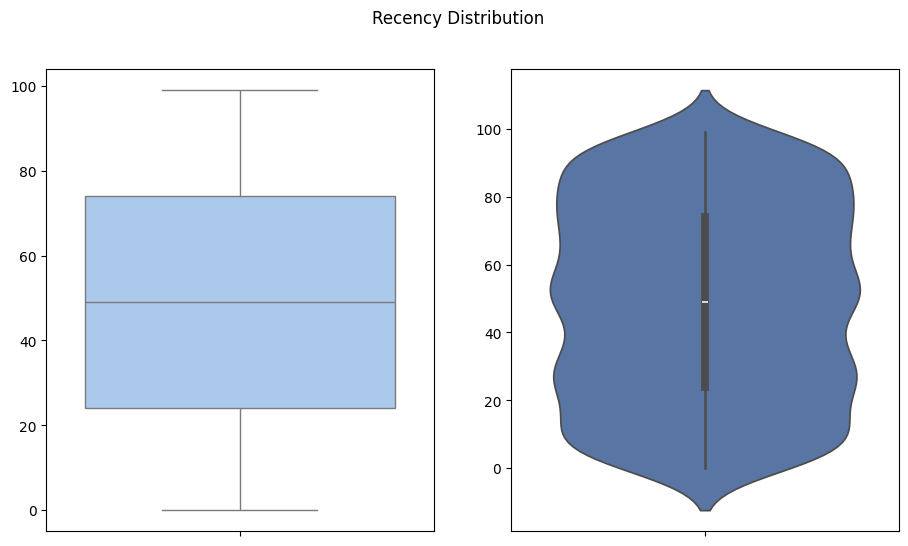

In [17]:
# RECENCY BOXPLOT AND VIOLIN PLOT

plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
sns.boxplot(data=data_clean, y='Recency', palette='pastel')
plt.ylabel('')

plt.subplot(1,2,2)
sns.violinplot(data=data_clean, y='Recency', palette='deep')
plt.ylabel('')

plt.suptitle('Recency Distribution')
plt.show()

In [18]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

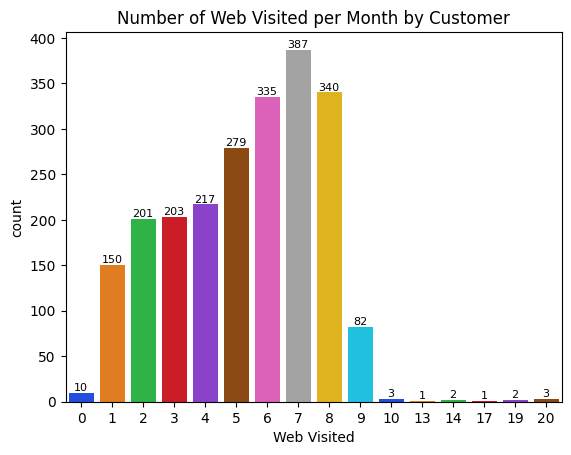

In [19]:
# DISPLAY NumWebVisitsMonth Histogram

axes = sns.countplot(data= numeric_data, x= 'NumWebVisitsMonth', palette='bright')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=8)
plt.title('Number of Web Visited per Month by Customer')
plt.xlabel('Web Visited')
plt.show()

Text(0.5, 1.0, 'Customer that Response to the Campaign')

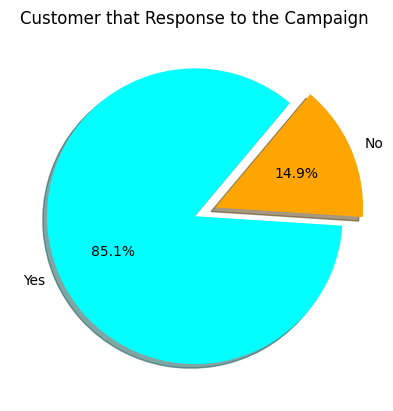

In [20]:
# DISPLAY RESPONSE CUSTOMER

plt.pie(data.Response.value_counts(), autopct='%1.1f%%', shadow=True, explode=[0,0.15], startangle= 50, colors=['cyan','orange'], labels=['Yes','No'])
plt.title('Customer that Response to the Campaign')

<h5>85% Customer Accept the Campaign

# Data Preprocessing

## - Label Encoding

In [21]:
# CONVERT EDUCATION AND MARITAL STATUS USING LABEL ENCODER

encoder = LabelEncoder()
data_clean['Education'] = encoder.fit_transform(data_clean['Education'])
data_clean['Marital_Status'] = encoder.fit_transform(data_clean['Marital_Status'])

data_clean.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


## - Feature Engineering

In [22]:
# ADD NEW 'AGE' FEATURE and 'Total items Purchases' Feature

# DECLARE CURRENT YEAR
current_year = datetime.now().year

data_clean['Age'] = current_year - data_clean['Year_Birth']
data_clean['Total_Items_Purchases'] = data_clean['MntWines'] + data_clean['MntFruits'] + data_clean['MntMeatProducts'] + data_clean['MntFishProducts'] + data_clean['MntSweetProducts'] + data_clean['MntGoldProds']

data_clean.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Items_Purchases
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,53


## - Feature Selection

In [23]:

#CHOOSE COLUMNS TO CLUSTER
cols_to_cluster = ['Income','Age','Education','Marital_Status','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Items_Purchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

data_cluster = data_clean[cols_to_cluster]

data_cluster

,Income,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Items_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,58138.0,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,46344.0,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,71613.0,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,26646.0,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,58293.0,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,2,3,0,1,46,709,43,182,42,118,247,1341,2,9,3,4
2236,64014.0,79,4,5,2,1,56,406,0,30,0,0,8,444,7,8,2,5
2237,56981.0,44,2,2,0,0,91,908,48,217,32,12,24,1241,1,2,3,13
2238,69245.0,69,3,5,0,1,8,428,30,214,80,30,61,843,2,6,5,10


## - Feature Scaling

In [24]:
# 

# CHOOSE FEATURE TO NORMALIZE
cols_to_normalize = ['Income']

# FIT MODEL
robust = RobustScaler()
data_cluster[cols_to_normalize] = robust.fit_transform(data_cluster[cols_to_normalize])

data_cluster.head(5)

,Income,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Items_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0.206595,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,-0.149787,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,0.613771,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,-0.745005,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,0.211279,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6


In [25]:
data_cluster['Income'].describe()

count    2208.000000
mean        0.010051
std         0.625900
min        -1.497896
25%        -0.486648
50%         0.000000
75%         0.513352
max         1.886550
Name: Income, dtype: float64

## - Check Correlation 

<Axes: >

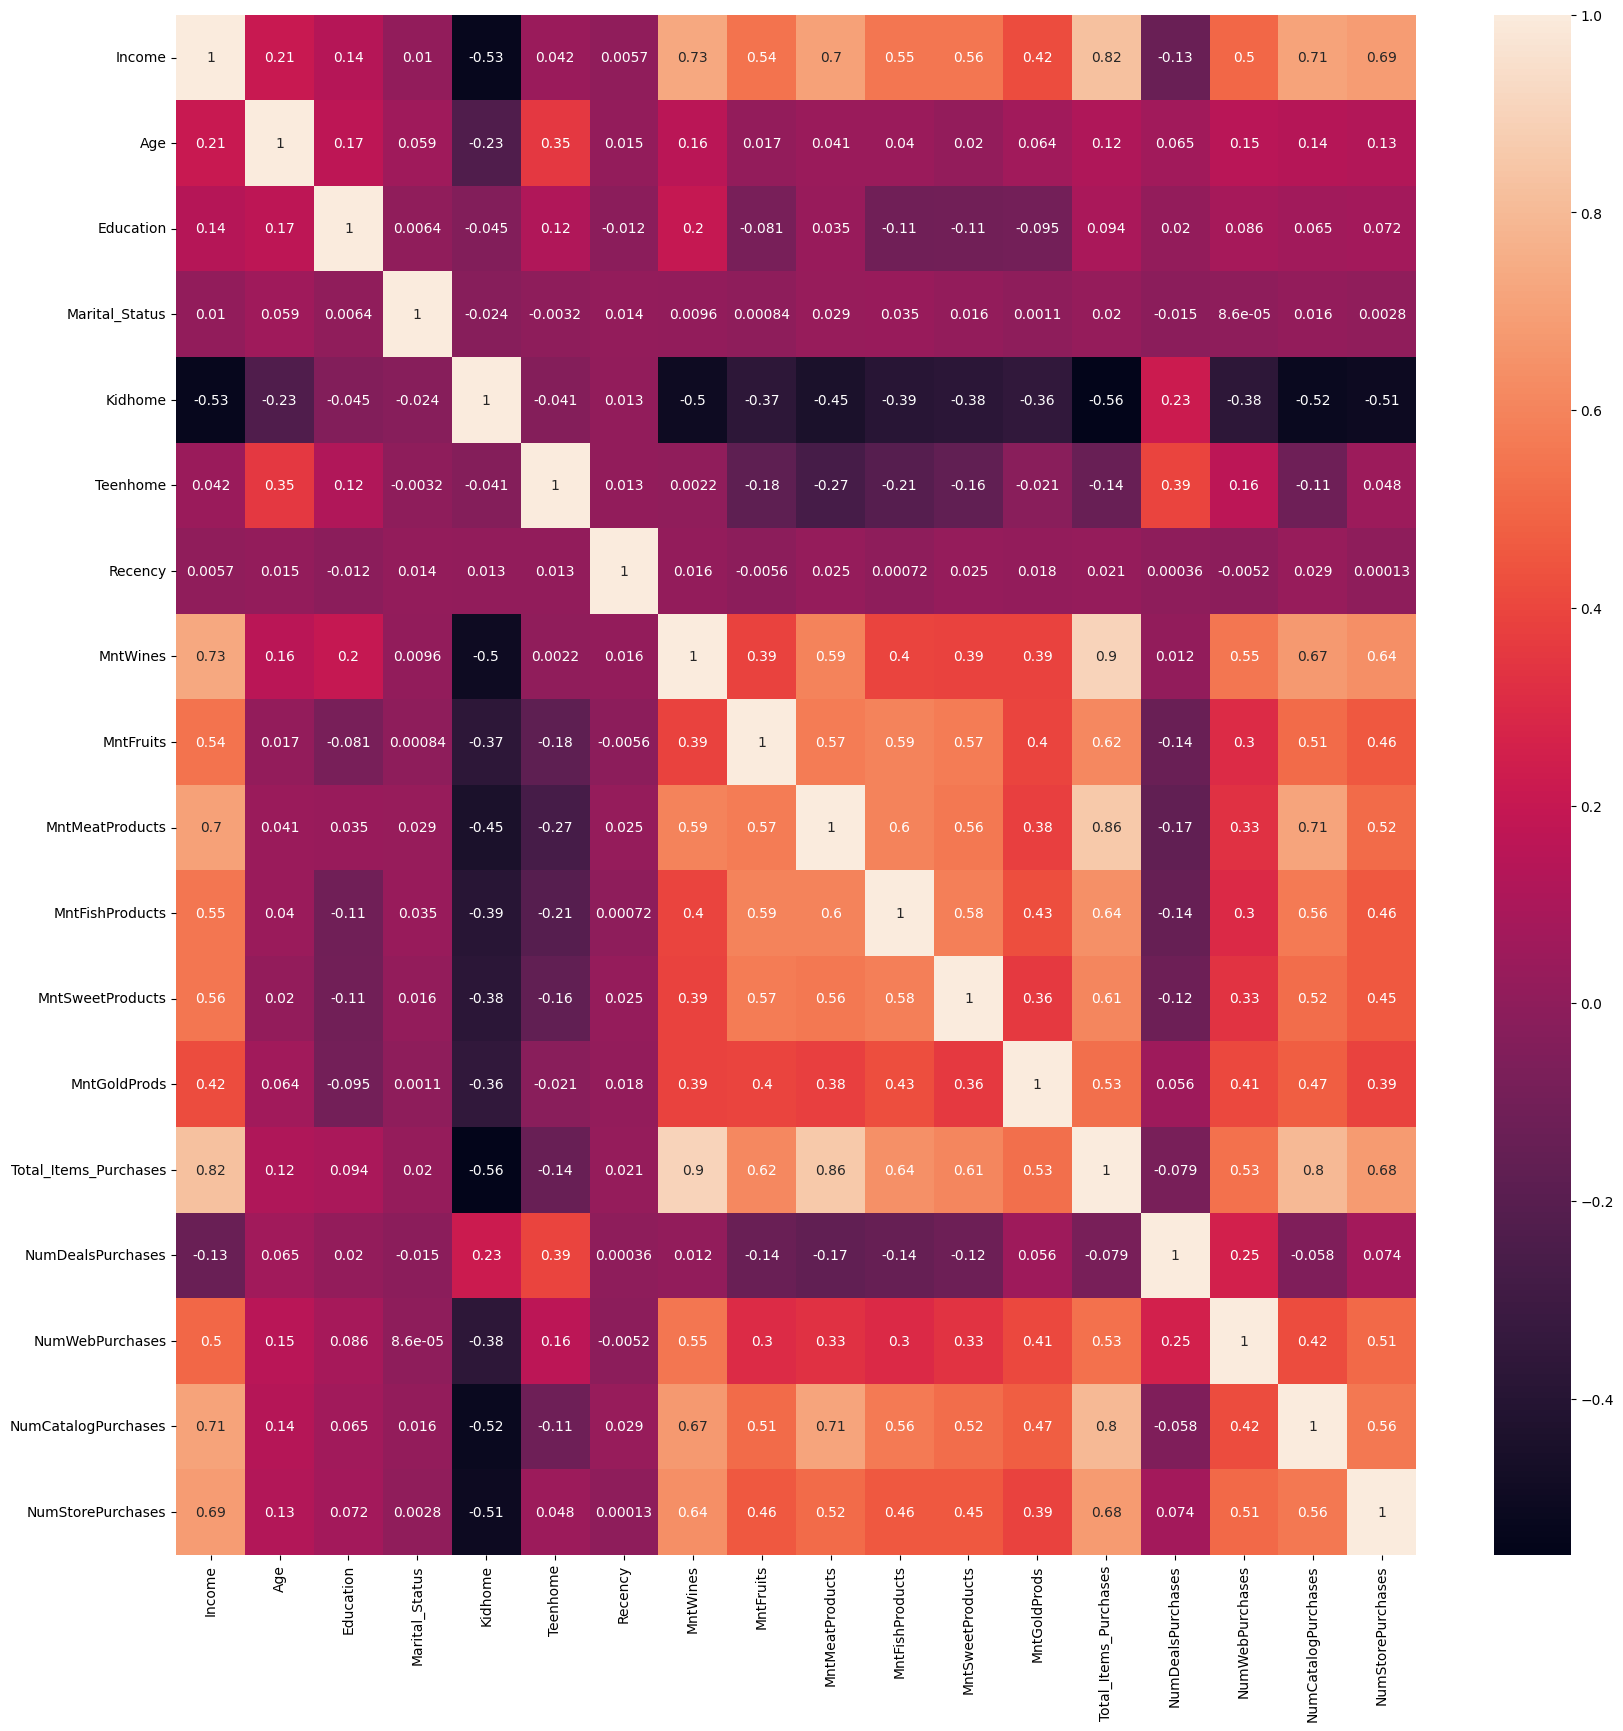

In [26]:
# CORRELATION

data_corr = data_cluster.corr('pearson')

plt.figure(figsize=(20,20))
sns.heatmap(data= data_corr, annot=True)

# K-Means Clustering

## - Find Optimal K - Cluster

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=12)
    kmeans.fit(data_reduced)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

NameError: name 'data_reduced' is not defined

In [ ]:
# CHECK HOW GOOD THE CLUSTER USING SILHOUETTE COEFFICIENT

k_range = range(2,11)
sil_scores = []

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=10)
    kmean.fit(data_reduced)
    label = kmean.labels_
    sil_score = silhouette_score(X= data_reduced, labels=label, metric='euclidean')
    sil_scores.append(sil_score)

plt.plot(k_range, sil_scores,'bo-', markersize=8)
plt.title('Silhouette Coefficient')
plt.xlabel('CLUSTER')
plt.ylabel('Silhouette Score')
plt.show()

## - Model Fitting

In [ ]:
# K-MEANS

fixed_kmean = KMeans(n_clusters=5, init='k-means++', random_state=12, n_init=1)
fixed_kmean.fit(data_reduced)

## - Evaluation

In [ ]:
# EVALUATION

wcss = fixed_kmean.inertia_
sil_coef = silhouette_score(X= data_reduced, labels=fixed_kmean.labels_)
davies_bouldin = davies_bouldin_score(X= data_reduced, labels= fixed_kmean.labels_)

print(f'WCSS Score : {wcss}')
print(f'Silhouette Coefficient Score : {sil_coef}')
print(f'Davies Bouldin Score : {davies_bouldin}')

## - Result

In [ ]:
# VISUALIZE K-MEANS USING 2D SCATTER PLOT

centroids = fixed_kmean.cluster_centers_

# SCATTER PLOT
plt.figure(figsize=(20,12))
plt.scatter(x= data_reduced[:,0], y= data_reduced[:,1], c= fixed_kmean.labels_, cmap='viridis', s=250, alpha=0.7)
plt.scatter(x= centroids[:,0], y=centroids[:,1], c='red', marker='X', label='Centroid', s=500)

# Cluster Summary


### **Cluster 1**  

####  **Demographics:**  
- **Average Income:** $76,596 (High standard deviation: ±10,204)  
- **Average Age:** 56 years (Wide variation: ±13 years)  
- **Marital Status:** Mostly married (Average score: 3.7)  
- **Education Level:** High school or university (Average: 2.6)  

####  **Spending Behavior:**  
- **High spenders on premium products:**  
  - Wine: **$849**  
  - Meat Products: **$502**  
  - Gold Products: **$77**  
- **Frequent shoppers:**  
  - Store Purchases: **8.37 purchases per person**  
- **Multi-channel buyers:** Likely to purchase through various sales channels.  

####  **Insights:**  
- **Luxury Consumers:** This group tends to buy premium and expensive products.  
- **Loyal Customers:** Their frequent purchases indicate high engagement.  
- **Marketing Strategy:** Offer loyalty programs, premium product bundles, and personalized promotions to maintain engagement.  

---

### **Cluster 2**  

####  **Demographics:**  
- **Average Income:** $37,221 (Much lower than Cluster 1, with high variation: ±13,620)  
- **Income Range:** $1,730 – $113,734  
- **Average Age:** 53.7 years (Younger than Cluster 1, but older than general population)  
- **Marital Status:** Mostly married (Average score: 3.7)  
- **Education Level:** Slightly lower than Cluster 1 (Average: 2.3)  

####  **Spending Behavior:**  
- **Lower spenders compared to Cluster 1:**  
  - Wine: **$69**  
- **Less frequent shoppers across channels:** Purchases are lower than Cluster 1.  

####  **Insights:**  
- **Price-Sensitive Consumers:** Their lower spending suggests budget-conscious behavior.  
- **Less Engagement:** They shop less frequently and have a lower affinity for luxury products.  
- **Marketing Strategy:** Offer discounts, loyalty rewards, and bundle deals to encourage more frequent spending.  

---

### **Cluster 3**  

####  **Demographics:**  
- **Average Income:** $65,583 (Higher than Cluster 2 but lower than Cluster 1, with ±11,003 variation)  
- **Average Age:** 57.8 years (Older than Cluster 2 but younger than Cluster 1)  
- **Marital Status:** Mostly married (Average score: 3.7)  
- **Education Level:** Slightly higher than Cluster 2 (Average: 2.4)  

####  **Spending Behavior:**  
- **Moderate spenders on premium products:**  
  - Wine: **$451** (Higher than Cluster 2 but lower than Cluster 1)  
- **Frequent shoppers:**  
  - Store Purchases: **8.6 purchases per person** (Higher than Cluster 2)  

####  **Insights:**  
- **Balanced Consumers:** These individuals purchase premium products but are more price-conscious than Cluster 1.  
- **Engaged Shoppers:** They shop frequently, making them valuable repeat customers.  
- **Marketing Strategy:** Offer mid-range product options, personalized recommendations, and targeted promotions to increase spending.  

